# Graduate Rotational Intership Program
## Name-Tarun Chittora
## Task#3-Prediction using decision tree algorithm


## Import relevent liberaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [12]:
data=pd.read_csv("Iris.csv")

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### since Id column has no significance so we can drop it.

In [14]:
data.drop(['Id'],axis=1,inplace=True)

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
data['Species'].value_counts('Normalize=1')

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

#### our data is balanced

In [19]:
x=data.iloc[:,:-1]

In [20]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y=data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)


### Splitting data into train and test

In [23]:
from sklearn.model_selection import  train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [25]:
x_train.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [26]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [29]:
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [30]:
confusion_matrix(y_train,y_train_pred)

array([[40,  0,  0],
       [ 0, 38,  0],
       [ 0,  0, 42]], dtype=int64)

### Checking the accuracy

In [31]:
accuracy=accuracy_score(y_test,y_test_pred)
accuracy

0.9666666666666667

#### Here we are getting acuraccy of 96.67% means our model is good fit for data

Text(0.5, 1.0, 'Decision Tree')

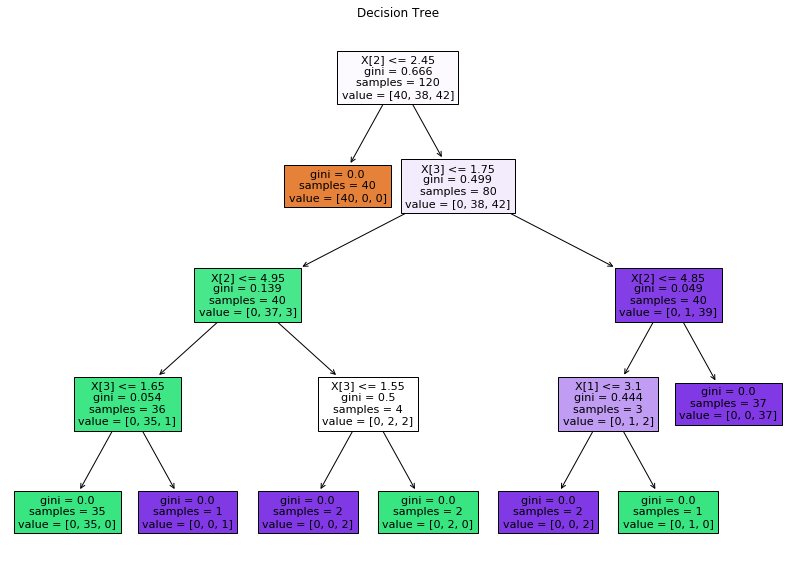

In [33]:
from sklearn import tree
plt.figure(figsize=(14,10))
tree.plot_tree(model,filled=True)
plt.title("Decision Tree")